In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import scipy.stats as sps

<IPython.core.display.Javascript object>


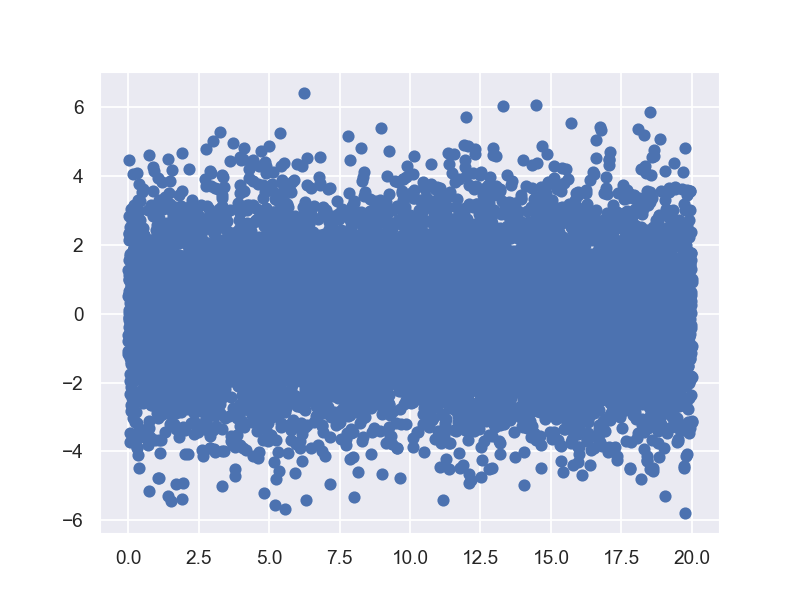

In [259]:
dataset = np.loadtxt("Problem_33/Problem_33_file_001.dat", delimiter="\t")
x = dataset[:, 0]
y = dataset[:, 1]

%matplotlib notebook
sns.set_theme()

plt.scatter(x,y)

<IPython.core.display.Javascript object>


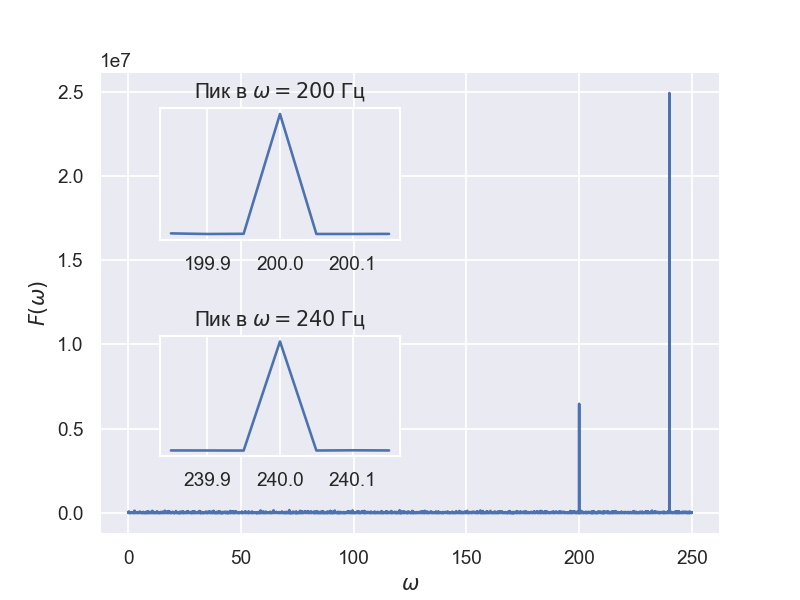

[200. 240.]


In [260]:
from scipy import fftpack
%matplotlib notebook
sns.set_theme()

# The FFT of the signal
y_fft = fftpack.fft(y)
time_step = x[1]-x[0]

# And the power (sig_fft is of complex dtype)
power = np.abs(y_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(y.size, d=time_step)

# Plot for positive frequences
plt.plot(sample_freq[(sample_freq > 0)], power[(sample_freq > 0)])
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)$')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where((sample_freq > 0) & (power>5e6))
peak_freqs = sample_freq[pos_mask]
print(peak_freqs)


axes = plt.axes([0.2, 0.6, 0.3, 0.22])
plt.title(r'Пик в $\omega=200$ Гц')
plt.plot(sample_freq[(sample_freq>199.8)&(sample_freq<200.2)], power[(sample_freq>199.8)&(sample_freq<200.2)])
power_peak = power[(sample_freq>199.8)&(sample_freq<200.2)]
plt.setp(axes, yticks=[])

axes = plt.axes([0.2, 0.24, 0.3, 0.2])
plt.title(r'Пик в $\omega=240$ Гц')
plt.plot(sample_freq[(sample_freq>239.8)&(sample_freq<240.2)], power[(sample_freq>239.8)&(sample_freq<240.2)])
plt.setp(axes, yticks=[])
plt.savefig('Fourier.pdf')

In [261]:
1/time_step/len(X)

0.05

<IPython.core.display.Javascript object>


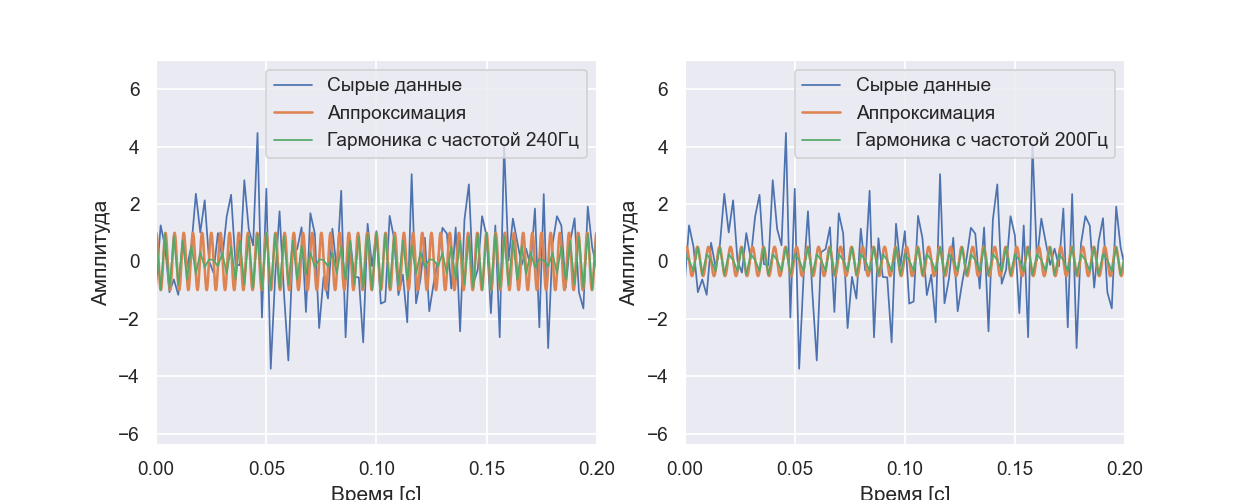

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [284]:
from scipy import fftpack
from scipy.optimize import curve_fit

%matplotlib notebook
sns.set_theme()

def f_sin(x, omega,A,  phi):
    return A*np.sin((x-phi)*2*np.pi*omega)

x_sin = np.linspace(0,1,10000)
y_sin = np.sin(x_sin*240*2*np.pi)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


bad1_freq_fft = y_fft.copy()

bad1_freq_fft[(np.abs(sample_freq)!=240)]=0
filtered_y = fftpack.ifft(bad1_freq_fft)
ax1.plot(x, y, lw=1, label='Сырые данные')
coef1, cov1 = curve_fit(f_sin, x, filtered_y, p0=[240, 1, 0])
ax1.plot(x_sin, f_sin(x_sin, *coef1), label=r'Аппроксимация')
ax1.plot(x, filtered_y, lw=1, label='Гармоника с частотой 240Гц')




ax1.set_xlim(0,0.2)

ax1.set_xlabel('Время [с]')
ax1.set_ylabel('Амплитуда')
ax1.legend(loc='best')

bad2_freq_fft = y_fft.copy()

bad2_freq_fft[(np.abs(sample_freq)!=200)]=0
filtered_y = fftpack.ifft(bad2_freq_fft)
ax2.plot(x, y, lw=1, label='Сырые данные')
coef2, cov2 = curve_fit(f_sin, x, filtered_y, p0=[200, 1, 0])
ax2.plot(x_sin, f_sin(x_sin, *coef2), label=r'Аппроксимация')
ax2.plot(x, filtered_y, lw=1, label='Гармоника с частотой 200Гц')

ax2.set_xlim(0,0.2)

ax2.set_xlabel('Время [с]')
ax2.set_ylabel('Амплитуда')
ax2.legend(loc='best')
plt.savefig('filt_2(1).pdf', bbox_inches='tight')

In [285]:
coef1, np.sqrt(np.diag(cov1))

(array([ 2.40000000e+02,  9.98310941e-01, -1.05066754e-03]),
 array([1.26810425e-13, 4.59196928e-12, 6.10187380e-15]))

In [287]:
coef2, np.sqrt(np.diag(cov2))

(array([ 2.00000000e+02,  5.08980743e-01, -4.16571167e-04]),
 array([3.03443584e-14, 5.60327502e-13, 1.75176512e-15]))

<IPython.core.display.Javascript object>


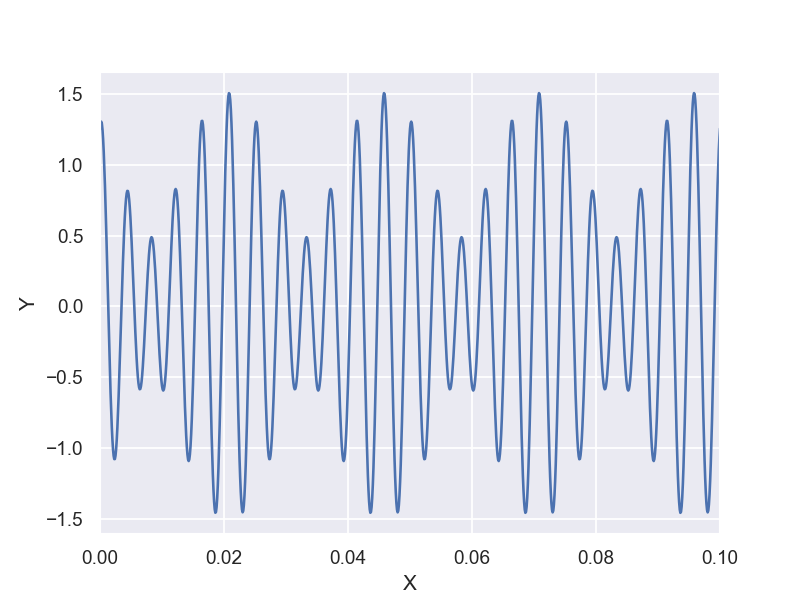

In [291]:
%matplotlib notebook
sns.set_theme()

plt.plot(x_sin, f_sin(x_sin, *coef1)+f_sin(x_sin, *coef2))
plt.xlim(0,0.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('sin.pdf')

In [304]:
%matplotlib notebook
sns.set_theme()

X = []
Y = []
output = np.array(['omega_1', 'A_1', 'phi_1', 'omega_1(std)', 'A_1(std)', 'phi_1(std)', 'omega_2', 'A_2', 'phi_2', 'omega_2(std)', 'A_2(std)', 'phi_2(std)'])
for file in os.listdir('Problem_33/'):
    dataset = np.loadtxt(os.path.join("Problem_33/", file), delimiter="\t")
    x = dataset[:, 0]
    y = dataset[:, 1]
    # The FFT of the signal
    y_fft = fftpack.fft(y)
    time_step = x[1]-x[0]

    # And the power (sig_fft is of complex dtype)
    power = np.abs(y_fft)**2

    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(y.size, d=time_step)


    bad1_freq_fft = y_fft.copy()
    bad1_freq_fft[(np.abs(sample_freq)!=240)]=0
    filtered_y = fftpack.ifft(bad1_freq_fft)
    coef1, cov1 = curve_fit(f_sin, x, filtered_y, p0=[240, 1, 0])

    bad2_freq_fft = y_fft.copy()
    bad2_freq_fft[(np.abs(sample_freq)!=200)]=0
    filtered_y = fftpack.ifft(bad2_freq_fft)
    coef2, cov2 = curve_fit(f_sin, x, filtered_y, p0=[200, 1, 0])
    output = np.vstack((output, np.concatenate((coef1, np.sqrt(np.diag(cov1)), coef2, np.sqrt(np.diag(cov2))))))

In [306]:
np.savetxt('Problem_33.csv', output, fmt="%s", delimiter=',')

<IPython.core.display.Javascript object>


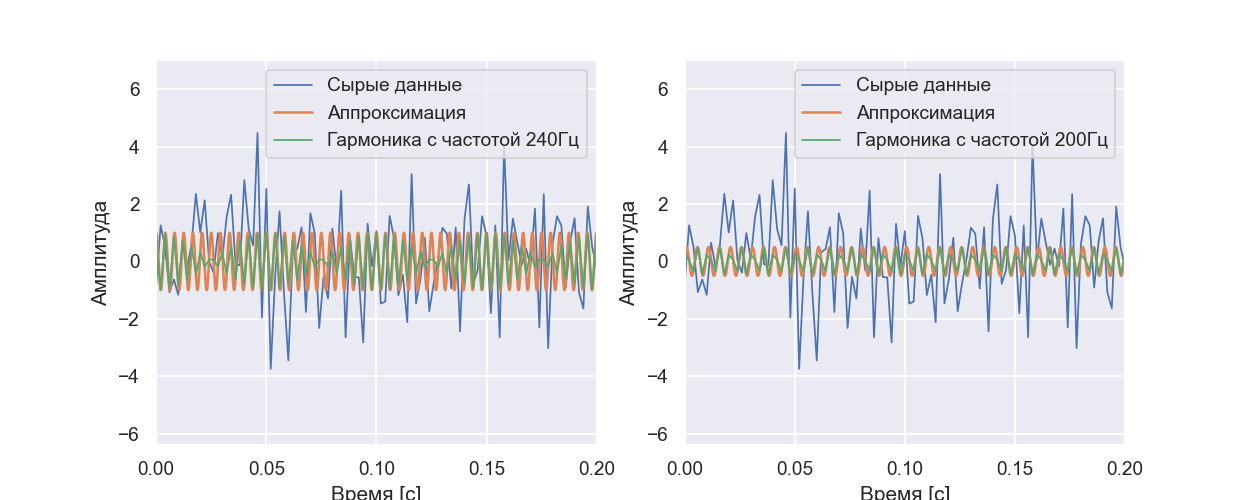

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [294]:
from scipy import fftpack
from scipy.optimize import curve_fit

%matplotlib notebook
sns.set_theme()

def f_sin(x, omega,A,  phi):
    return A*np.sin((x-phi)*2*np.pi*omega)

x_sin = np.linspace(0,1,10000)
y_sin = np.sin(x_sin*240*2*np.pi)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


bad1_freq_fft = y_fft.copy()

bad1_freq_fft[(np.abs(sample_freq)!=240)]=0
filtered_y = fftpack.ifft(bad1_freq_fft)
ax1.plot(x, y, lw=1, label='Сырые данные')
coef1, cov1 = curve_fit(f_sin, x, filtered_y, p0=[240, 1, 0])
ax1.plot(x_sin, f_sin(x_sin, *coef1), label=r'Аппроксимация')
ax1.plot(x, filtered_y, lw=1, label='Гармоника с частотой 240Гц')




ax1.set_xlim(0,0.2)

ax1.set_xlabel('Время [с]')
ax1.set_ylabel('Амплитуда')
ax1.legend(loc='best')

bad2_freq_fft = y_fft.copy()

bad2_freq_fft[(np.abs(sample_freq)!=200)]=0
filtered_y = fftpack.ifft(bad2_freq_fft)
ax2.plot(x, y, lw=1, label='Сырые данные')
coef2, cov2 = curve_fit(f_sin, x, filtered_y, p0=[200, 1, 0])
ax2.plot(x_sin, f_sin(x_sin, *coef2), label=r'Аппроксимация')
ax2.plot(x, filtered_y, lw=1, label='Гармоника с частотой 200Гц')

ax2.set_xlim(0,0.2)

ax2.set_xlabel('Время [с]')
ax2.set_ylabel('Амплитуда')
ax2.legend(loc='best')
plt.savefig('filt_2(1).pdf', bbox_inches='tight')

In [295]:
coef1, np.sqrt(np.diag(cov1))

(array([ 2.40000000e+02,  9.99357422e-01, -1.04915003e-03]),
 array([1.35592230e-13, 4.91535341e-12, 6.52437865e-15]))

In [326]:
%matplotlib notebook
sns.set_theme()

X = []
Y = []
for file in os.listdir('Problem_33/'):
    dataset = np.loadtxt(os.path.join("Problem_33/", file), delimiter="\t")
    X.append(dataset[:, 0])
    Y.append(dataset[:, 1])
Y = np.mean(np.array(Y), axis=0)
X = np.mean(np.array(X), axis=0)

y_fft = fftpack.fft(Y)
time_step = x[1]-x[0]

# And the power (sig_fft is of complex dtype)
power = np.abs(y_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(Y.size, d=time_step)


bad1_freq_fft = y_fft.copy()
bad1_freq_fft[(np.abs(sample_freq)!=240)]=0
filtered_y = fftpack.ifft(bad1_freq_fft)
coef1, cov1 = curve_fit(f_sin, X, filtered_y, p0=[240, 1, 0])

bad2_freq_fft = y_fft.copy()
bad2_freq_fft[(np.abs(sample_freq)!=200)]=0
filtered_y = fftpack.ifft(bad2_freq_fft)
coef2, cov2 = curve_fit(f_sin, X, filtered_y, p0=[200, 1, 0])


<IPython.core.display.Javascript object>


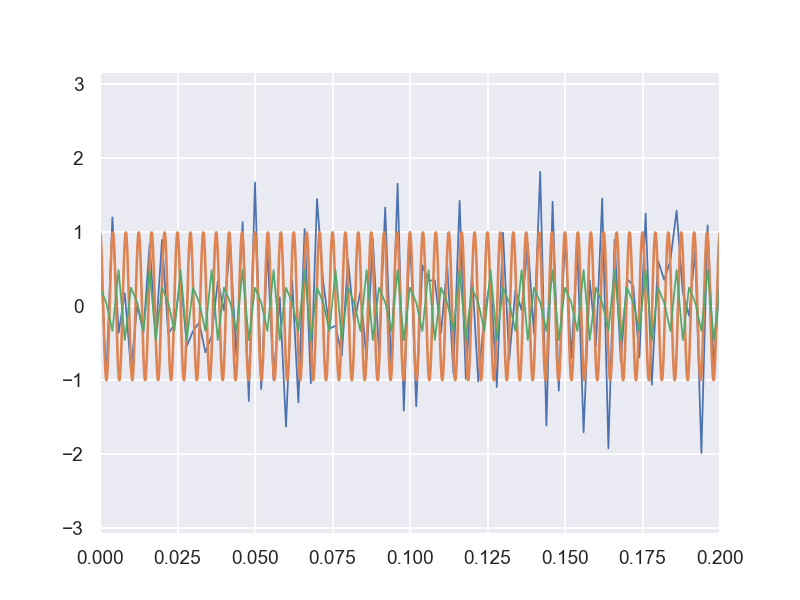

D:\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.2)

In [327]:
plt.figure()
plt.plot(X, Y, lw=1, label='Сырые данные')
plt.plot(x_sin, f_sin(x_sin, *coef1), label=r'Аппроксимация')
plt.plot(X, filtered_y, lw=1, label='Гармоника с частотой 240Гц')
plt.xlim(0,0.2)

In [328]:
coef1, np.sqrt(np.diag(cov1))


(array([ 2.40000000e+02,  9.99357422e-01, -1.04915003e-03]),
 array([9.33792631e-14, 3.38506602e-12, 4.49323398e-15]))

In [325]:
coef2, np.sqrt(np.diag(cov2))

(array([ 2.00000000e+02,  4.99558786e-01, -4.18813375e-04]),
 array([2.06565215e-14, 3.74300705e-13, 1.19240745e-15]))